In [1]:
import torch
import torch.nn as nn
import torch.utils.data as data
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image, ImageOps
import os
import torch.nn.functional as F
from torchvision.utils import save_image


# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

class CustomImageDataset(Dataset):
    
    # finish this part

Using cpu device


In [2]:
sample_dir = 'samples'
if not os.path.exists(sample_dir):
    os.makedirs(sample_dir)

In [3]:

h_dim = 400
z_dim = 20
num_epochs = 15
batch_size = 128
learning_rate = 1e-3

image_size = 128 * 128

transforms_train = transforms.Compose([transforms.Resize((128, 128)),
                                       transforms.RandomRotation(10.),
                                       transforms.ToTensor()])


train_data_set = CustomImageDataset(data_set_path="./cat_dog/train", transforms=transforms_train)

data_loader = torch.utils.data.DataLoader(dataset=train_data_set, batch_size=batch_size, shuffle=True)

In [4]:
# VAE model
class VAE(nn.Module):
    def __init__(self, image_size=128*128, h_dim=400, z_dim=20):
        super(VAE, self).__init__()
        # finish this part
        

    def encode(self, x):
        # finish this part

    def reparameterize(self, mu, log_var):
        # finish this part

    def decode(self, z):
        # finish this part
    

    def forward(self, x):
        # finish this part

model = VAE().to(device)

In [5]:

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
    for i, (x, _) in enumerate(data_loader):

        x = x.to(device).view(-1, image_size)
        x_reconst, mu, log_var = model(x)
        

        reconst_loss = F.binary_cross_entropy(x_reconst, x, size_average=False)
        kl_div = - 0.5 * torch.sum(1 + log_var - mu.pow(2) - log_var.exp())
        
        
        loss = reconst_loss + kl_div
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 2 == 0:
            print ("Epoch[{}/{}], Step [{}/{}], Reconst Loss: {:.4f}, KL Div: {:.4f}" 
                   .format(epoch+1, num_epochs, i+1, len(data_loader), reconst_loss.item(), kl_div.item()))
    
    
    with torch.no_grad():
        
        z = torch.randn(batch_size, z_dim).to(device)
        out = model.decode(z).view(-1, 1, 128, 128)
        save_image(out, os.path.join(sample_dir, 'sampled-{}.png'.format(epoch+1)))

        
        out, _, _ = model(x)
        x_concat = torch.cat([x.view(-1, 1, 128, 128), out.view(-1, 1, 128, 128)], dim=3)
        save_image(x_concat, os.path.join(sample_dir, 'reconst-{}.png'.format(epoch+1)))


C:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\functional.py:1805: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
C:\Users\user\anaconda3\envs\pytorch\lib\site-packages\torch\nn\_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


Epoch[1/15], Step [2/4], Reconst Loss: 1605804.8750, KL Div: 30220.6660
Epoch[1/15], Step [4/4], Reconst Loss: 190735.7969, KL Div: 1579.6826
Epoch[2/15], Step [2/4], Reconst Loss: 1482765.0000, KL Div: 11417.7314
Epoch[2/15], Step [4/4], Reconst Loss: 180821.7812, KL Div: 393.6219
Epoch[3/15], Step [2/4], Reconst Loss: 1451472.0000, KL Div: 3536.0493
Epoch[3/15], Step [4/4], Reconst Loss: 179910.8594, KL Div: 369.7997
Epoch[4/15], Step [2/4], Reconst Loss: 1444340.5000, KL Div: 4142.0913
Epoch[4/15], Step [4/4], Reconst Loss: 180880.3125, KL Div: 520.7228
Epoch[5/15], Step [2/4], Reconst Loss: 1436901.1250, KL Div: 3690.7437
Epoch[5/15], Step [4/4], Reconst Loss: 178677.5625, KL Div: 371.2938
Epoch[6/15], Step [2/4], Reconst Loss: 1428284.3750, KL Div: 2655.5454
Epoch[6/15], Step [4/4], Reconst Loss: 178833.9062, KL Div: 324.3268
Epoch[7/15], Step [2/4], Reconst Loss: 1420220.5000, KL Div: 2550.5488
Epoch[7/15], Step [4/4], Reconst Loss: 173723.8438, KL Div: 327.4461
Epoch[8/15], Step

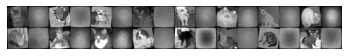

In [6]:
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 
import numpy as np
reconsPath = './samples/reconst-15.png'
Image = mpimg.imread(reconsPath)
plt.imshow(Image)
plt.axis('off')
plt.show()


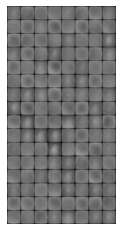

In [7]:
genPath = './samples/sampled-15.png'
Image = mpimg.imread(genPath)
plt.imshow(Image) 
plt.axis('off') 
plt.show()